In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os 
os.getcwd()

'/Users/shashanksule/Documents/CV_learning/butane_AE/feature_map_plane_align'

In [ ]:
# get data here 
data_dict = np.load("../ground_data/butane_nonaligned.npz", allow_pickle=True)
data = data_dict["data_all_atom"][::10,:]
dihedrals = data_dict["dihedrals"][::10]

In [4]:
from cv_loader import get_planealign_cv

In [5]:
device = torch.device("mps")
cv = get_planealign_cv(device)

TypeError: cannot assign 'torch.nn.modules.module._IncompatibleKeys' as child module 'encoder' (torch.nn.Module or None expected)

In [6]:
import sys 
import os
src_path = os.path.abspath('../../src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)





In [15]:
from _dnet_architectures import Encoder
from feature_maps import OrthogonalChangeOfBasisUnbatched
from feature_maps import OrthogonalChangeOfBasisBatched
import torch
device = torch.device("mps")
activation = nn.Tanh()
input_dim = 42
hidden1_dim = 32
hidden2_dim = 32
hidden3_dim = 32
hidden4_dim = 32
encoder_dim = 2
encoder = Encoder(activation, input_dim, hidden1_dim, hidden2_dim, hidden3_dim, hidden4_dim, encoder_dim).to(device)
encoder.load_state_dict(torch.load("plane_align_diffusion_net.pth", map_location=device))
feature_map = OrthogonalChangeOfBasisBatched()

In [16]:
featurized_pts = feature_map(torch.tensor(data).to(device))
mapped_points = encoder(featurized_pts)

In [17]:
manifold_pts = mapped_points.detach().cpu().numpy()

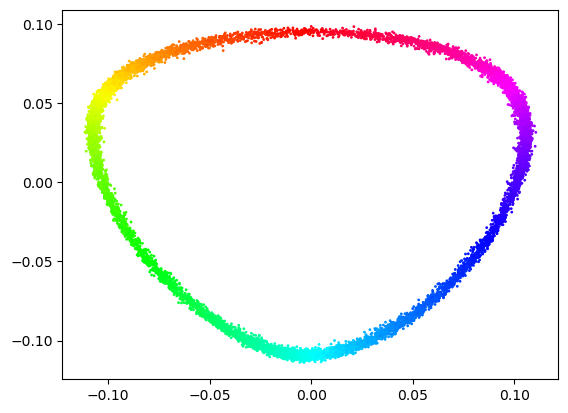

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(manifold_pts[:, 0], -manifold_pts[:, 1], c=dihedrals, cmap='hsv', s=1.0)

In [28]:
cv = torch.arctan2(mapped_points[:, 1], mapped_points[:, 0])

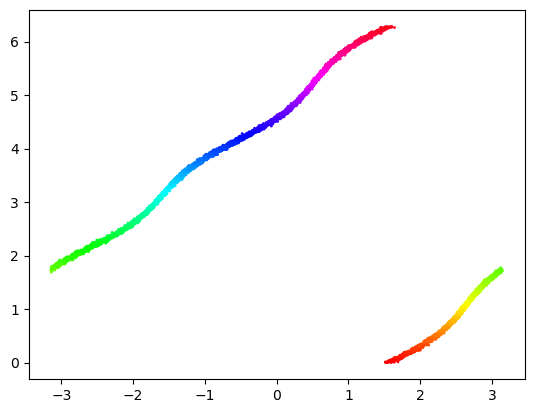

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(-cv.cpu().detach().numpy(), dihedrals, c=dihedrals, cmap='hsv', s=1.0)
plt.show()